# Loan Sanction Amount

For buying a house, one has to do a lot of planning.Once you have finalized your budget and the house that you want to buy, you must ensure that you have sufficient funds to pay the seller.Once finalised,most of us depend on home loans to buy our dream home.The bank only lends up to 80% of the total amount based on a person's finances. Rest of the money has to be made by themselves.

Here we are analysing the dataset of XYZ bank. This includes
1.cleaning the data by replacing all null values and errors
2.using bivariate analysis, showing up the relationship one independent has on our dependent variable

### 1. reading the data

In [67]:
import pandas as pd #import packages
import numpy as np

In [121]:
df=pd.read_excel('loan_train.xlsx') #read the data

In [69]:
df.head() 

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [72]:
df.shape

(30000, 24)

In [73]:
df.isna().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

### 2.Variable Type

the dataset consist of 30,000 rows and 24 columns.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

some features like gender,income,type of employement etc consist of null values

In [75]:
df.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [76]:
#Null value as percentage 
perc=(df.isna().sum()/df.shape[0])*100
perc

Customer ID                     0.000000
Name                            0.000000
Gender                          0.176667
Age                             0.000000
Income (USD)                   15.253333
Income Stability                5.610000
Profession                      0.000000
Type of Employment             24.233333
Location                        0.000000
Loan Amount Request (USD)       0.000000
Current Loan Expenses (USD)     0.573333
Expense Type 1                  0.000000
Expense Type 2                  0.000000
Dependents                      8.310000
Credit Score                    5.676667
No. of Defaults                 0.000000
Has Active Credit Card          5.220000
Property ID                     0.000000
Property Age                   16.166667
Property Type                   0.000000
Property Location               1.186667
Co-Applicant                    0.000000
Property Price                  0.000000
Loan Sanction Amount (USD)      1.133333
dtype: float64

In [77]:
#dropping variables which are not relevant
df.drop(['Customer ID','Name','Property ID'],axis=1,inplace=True)

### 3.Measures of Central Tendency

3.1 Mean

In [78]:
print("the mean of the loan sanction amount data is: ",df.mean())

the mean of the loan sanction amount data is:  Age                                40.092300
Income (USD)                     2630.574417
Loan Amount Request (USD)       88826.333855
Current Loan Expenses (USD)       400.936876
Dependents                          2.253027
Credit Score                      739.885381
No. of Defaults                     0.193933
Property Age                     2631.119440
Property Type                       2.460067
Co-Applicant                       -4.743867
Property Price                 131759.680252
Loan Sanction Amount (USD)      47649.342208
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_17460\1810960270.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("the mean of the loan sanction amount data is: ",df.mean())


We can see that for a person earning an average income of 2630 a loan amount of average 47649 was sanctioned. The loan amount request is at an average of 88826 which is way higher than amount sanctioned.The average for co applicant is negative which means some negative value is present within the column.And we can also understand that for a property at an average amount of 131759 loan of average 47649(which is lesser than 50%) will be provided by bank.

3.2 Median

In [79]:
print("the median for values are:",df.median())

the median for values are: Age                                40.000
Income (USD)                     2222.435
Loan Amount Request (USD)       75128.075
Current Loan Expenses (USD)       375.205
Dependents                          2.000
Credit Score                      739.820
No. of Defaults                     0.000
Property Age                     2223.250
Property Type                       2.000
Co-Applicant                        1.000
Property Price                 109993.610
Loan Sanction Amount (USD)      35209.395
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_17460\2739548470.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("the median for values are:",df.median())


Loan amount request is 75128 which means 50% has asked below it and 50% above it in which 35209(50% of applied) has been sanctioned.

3.3 Mode

In [80]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
0,F,Low,Working,Sales staff,Semi-Urban,N,N,NaN,Rural
1,M,Low,Working,NaN,Semi-Urban,N,Y,Unpossessed,Rural
2,F,High,Pensioner,NaN,Semi-Urban,N,Y,Unpossessed,Urban
3,F,High,Pensioner,NaN,Rural,N,Y,Unpossessed,Semi-Urban
4,F,Low,Working,High skill tech staff,Semi-Urban,N,Y,Active,Semi-Urban


In [81]:
df_cat.mode()

,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
0,M,Low,Working,Laborers,Semi-Urban,N,Y,Active,Semi-Urban


we can see that person with lower income stability(28317) apply for loan and their type of employment is Laborers(22730).People prefer staying in semi urban locality(29644) as we can see people of those area have applied for loan.

In [82]:
df_cat.describe()

,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
count,29947,28317,30000,22730,30000,30000,30000,28434,29644
unique,2,2,8,18,3,2,2,3,3
top,M,Low,Working,Laborers,Semi-Urban,N,Y,Active,Semi-Urban
freq,15053,25751,16926,5578,21563,19214,20180,9771,10387


We can see a wide variety in profession and type of employment of people who have applied for loan as their unique values are 8 and 18

In [83]:
df_cat.isna().sum()

Gender                      53
Income Stability          1683
Profession                   0
Type of Employment        7270
Location                     0
Expense Type 1               0
Expense Type 2               0
Has Active Credit Card    1566
Property Location          356
dtype: int64

3.4 Value Counts

Here we can see that there are 9 categorical variables. we are going to look at the uniqueness of values present in them

#### 1.Gender 

In [84]:
df['Gender'].value_counts()

M    15053
F    14894
Name: Gender, dtype: int64

In [85]:
df['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [86]:
df['Gender'].isna().sum()

53

In [87]:
df['Gender'].fillna(df['Gender'].mode().values[0],inplace=True)

In [88]:
df['Gender'].isna().sum()

0

In [89]:
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,...,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,...,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,...,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28


We can see that other than F & M there are many nan values also present in this column.

#### 2.Income Stability

In [90]:
df['Income Stability'].value_counts() #low is of highest frequency

Low     25751
High     2566
Name: Income Stability, dtype: int64

In [91]:
df['Income Stability'].unique() #there are 1683 null values

array(['Low', 'High', nan], dtype=object)

In [92]:
df['Income Stability'].isna().sum()

1683

In [93]:
df['Income Stability'].fillna(df['Income Stability'].mode().values[0],inplace=True)

In [94]:
df['Income Stability'].isna().sum()

0

#### 3.Profession  

In [95]:
df['Profession'].unique()

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [96]:
df['Profession'].value_counts()

Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: Profession, dtype: int64

Loans are taken in higher number by working class.

#### 4. Type of Employment

In [97]:
df['Type of Employment'].value_counts()

Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: Type of Employment, dtype: int64

In [98]:
df['Type of Employment'].unique()

array(['Sales staff', nan, 'High skill tech staff', 'Secretaries',
       'Laborers', 'Managers', 'Cooking staff', 'Core staff', 'Drivers',
       'Realty agents', 'Security staff', 'Accountants',
       'Private service staff', 'Waiters/barmen staff', 'Medicine staff',
       'Cleaning staff', 'Low-skill Laborers', 'HR staff', 'IT staff'],
      dtype=object)

In [99]:
df['Type of Employment'].isna().sum()

7270

In [100]:
df['Type of Employment'].mode()

0    Laborers
Name: Type of Employment, dtype: object

In [101]:
df.fillna(df['Type of Employment'].mode().values[0],inplace=True) #replacing the null values present with mode

In [102]:
df['Type of Employment'].isna().sum()

0

#### 5.Has Active Credit Card 

In [103]:
df['Has Active Credit Card'].unique()

array(['Laborers', 'Unpossessed', 'Active', 'Inactive'], dtype=object)

In [104]:
df['Has Active Credit Card'].mode()

0    Active
Name: Has Active Credit Card, dtype: object

In [105]:
df['Has Active Credit Card'].isna().sum()

0

In [106]:
df['Has Active Credit Card'].fillna(df['Has Active Credit Card'].mode().values[0],inplace=True)

In [107]:
df['Has Active Credit Card'].isna().sum()

0

#### 6.Property Location

In [108]:
df['Property Location'].unique()

array(['Rural', 'Urban', 'Semi-Urban', 'Laborers'], dtype=object)

In [109]:
df['Property Location'].mode()

0    Semi-Urban
Name: Property Location, dtype: object

In [110]:
df['Property Location'].isna().sum()

0

In [111]:
df['Property Location'].fillna(df['Property Location'].mode().values[0],inplace=True)

In [112]:
df['Property Location'].isna().sum()

0

Here we have dealt with all categorical variables and have replaced all null values in it with mode. now we can start dealing with numerical null values

3.4 Inter Quartile Range

In [113]:
#first quartile
df.quantile(0.25)

Age                             25.000
Loan Amount Request (USD)    41177.755
No. of Defaults                  0.000
Property Type                    1.000
Co-Applicant                     1.000
Property Price               60572.160
Name: 0.25, dtype: float64

first quartile means 25% of the data is below or equal to this value and 75% of data is above it.We can see that 25% of applicants are of age 25 who applies for loan amount of 42k for property price of 60k.We can also see that co applicant and property type are numericals which are already encoded.

In [114]:
#second quartile
df.quantile(0.5)

Age                              40.000
Loan Amount Request (USD)     75128.075
No. of Defaults                   0.000
Property Type                     2.000
Co-Applicant                      1.000
Property Price               109993.610
Name: 0.5, dtype: float64

In [115]:
#third quartile
df.quantile(0.75)

Age                              55.000
Loan Amount Request (USD)    119964.605
No. of Defaults                   0.000
Property Type                     3.000
Co-Applicant                      1.000
Property Price               178880.720
Name: 0.75, dtype: float64

In [116]:
print(df.quantile(0.75)-df.quantile(0.25))

Age                              30.00
Loan Amount Request (USD)     78786.85
No. of Defaults                   0.00
Property Type                     2.00
Co-Applicant                      0.00
Property Price               118308.56
dtype: float64


Here we can see that dispersion is quite significant in every numeric categories. For loan amount & property price request the dispersion is quite hgh which means that it consist of large number of outliers.

3.5 Range

In [49]:
df_num =df.select_dtypes(include=np.number)

#to find range
print(df_num.max()-df_num.min())

Age                               47.00
Loan Amount Request (USD)     615449.58
No. of Defaults                    1.00
Property Type                      3.00
Co-Applicant                    1000.00
Property Price               1078965.73
dtype: float64


The difference between lowest and highest property is 1078965 rs which means the dispersion is quite high and it contain outliers.

3.6 Variance

In [50]:
var=df_num.var()
round(var,3)

Age                          2.574460e+02
Loan Amount Request (USD)    3.544648e+09
No. of Defaults              1.560000e-01
Property Type                1.251000e+00
Co-Applicant                 5.567337e+03
Property Price               8.751518e+09
dtype: float64

3.7 Deviation

In [51]:
#calculate standard deviation
print(df.std())

Age                             16.045129
Loan Amount Request (USD)    59536.949605
No. of Defaults                  0.395384
Property Type                    1.118562
Co-Applicant                    74.614593
Property Price               93549.548104
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_17460\4056096182.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


Here no of defaults has deviation value near to zero which means there is no much variance. however we cannot use deviation as an apt measure of study because each value will be of different units and it is not sensible to compare values of different units.

# 4.Distributuion of data

We will look aat the distribution of categorical variables through countplot and numerical variable through density plot to know about the apread of data

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
var_categorical = ['Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location',
                  'Expense Type 1', 'Expense Type 2', 'Dependents', 'No. of Defaults', 'Has Active Credit Card',
                  'Property Type', 'Property Location', 'Co-Applicant']
var_numerical = df.select_dtypes(include=np.number)

In [54]:
var_target = ['Loan Sanction Amount (USD)']

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

<Figure size 1500x600 with 0 Axes>

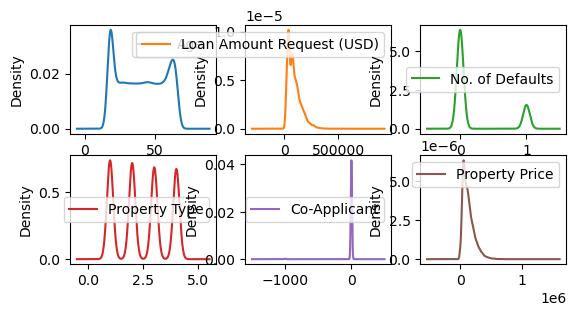

In [55]:
#for plotting density
plt.figure(figsize=(15,6))
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# 5 Shape of data

### 1.Skewness

In [56]:
df.skew()

C:\Users\User\AppData\Local\Temp\ipykernel_17460\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age                           0.046094
Loan Amount Request (USD)     1.260392
No. of Defaults               1.548303
Property Type                 0.051070
Co-Applicant                -13.250768
Property Price                1.416965
dtype: float64

The variables age & property type are normal
Loan Amount Request (USD),No. of Defaults & Property Price are highly positively skewed, more values are distributed towards left side and right tail is longer.
Co-Applicant is highly negatively skewed more points are distributed towards right side and left tail is longer.
This means both the right skewed and left skewed consist of outliers.


In [57]:
### 2.Kurtosis

In [58]:
df.kurtosis()

C:\Users\User\AppData\Local\Temp\ipykernel_17460\615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Age                           -1.382083
Loan Amount Request (USD)      2.103380
No. of Defaults                0.397270
Property Type                 -1.359001
Co-Applicant                 173.598387
Property Price                 3.149422
dtype: float64

# BOX PLOT

Box plot helps to visualise the outlliers present in data. 
For positively skewed distribution median is towards first quartile
for negatively skewed it is more shifted towards third quartile(towards right or up)
for zero skewness the median is in the middle of box plot

The points which lies away from whiskers shoes the outliers present in the distribution

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
df['Loan Sanction Amount (USD)'].isna().sum()

0

In [61]:
import numpy as np
np.sum(df['Loan Sanction Amount (USD)']==0)

7865

In [62]:
var_target=df['Loan Sanction Amount (USD)']

7865 applicants have got 0 loan amount sanctioned. This means loan was not sanctioned to them.

we came to conclusion that most of our data in target variable is zero that means no loan was sanctioned to those customers.

#### Correlation

In [63]:
import seaborn as sns
import numpy as np

<AxesSubplot:>

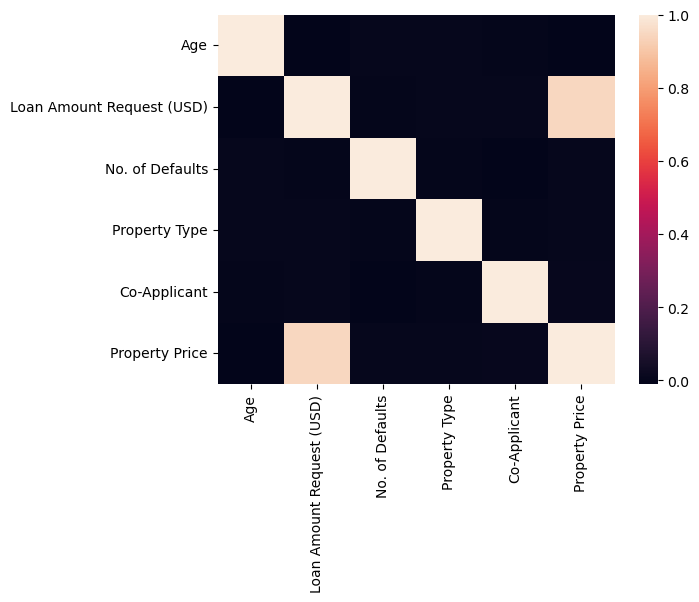

In [64]:
sns.heatmap(df.corr())

We can see that there is 0.95 collinearity, but bank only lents 80% of money requested so we create a new column which stores minimum of request amount and 80% of property price

In [65]:
df = df.drop(["Property Age"], axis = 1,inplace= True)

### Handling numerical missing values

#### 1. Income (USD)

In [120]:
df['Income (USD)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: Income (USD)
Non-Null Count  Dtype 
--------------  ----- 
30000 non-null  object
dtypes: object(1)
memory usage: 234.5+ KB


In [122]:
df['Income (USD)'].isnull().sum()

4576

In [124]:
a=df['Income (USD)'].mean()
a

2630.5744174795564

As we notice that income has large number of outliers we replace null values with median

In [125]:
df['Income (USD)'].fillna(df['Income (USD)'].median(),inplace=True)

#### 2. Current Loan Expenses (USD)  

In [126]:
df['Current Loan Expenses (USD)'].value_counts()

-999.00    177
 366.37      6
 333.79      6
 340.39      5
 185.90      5
          ... 
 192.78      1
 612.22      1
 288.52      1
 788.17      1
 693.94      1
Name: Current Loan Expenses (USD), Length: 24041, dtype: int64

we can see it has -999 which is by mistake.so we will replace it with null at first and then replace it with median since it has outliers

In [127]:
for i in range(len(df)):
    if df['Current Loan Expenses (USD)'][i]==-999:
        df['Current Loan Expenses (USD)'][i]=np.nan
        
    

C:\Users\User\AppData\Local\Temp\ipykernel_17460\907759258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Current Loan Expenses (USD)'][i]=np.nan


In [128]:
df['Current Loan Expenses (USD)'].isna().sum()

349

In [129]:
df['Current Loan Expenses (USD)'].unique()

array([241.08, 495.81, 171.95, ..., 583.11, 378.29, 693.94])

In [130]:
df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].median(),inplace=True)

In [131]:
df['Current Loan Expenses (USD)'].isna().sum()

0

#### 3.Dependents

In [132]:
df['Dependents'].value_counts()

2.0     13108
3.0      5719
1.0      5544
4.0      2704
5.0       372
6.0        50
7.0         7
8.0         1
10.0        1
14.0        1
Name: Dependents, dtype: int64

In [133]:
df['Dependents'].isna().sum()

2493

In [134]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode().values[0],inplace=True)

#### 4.Credit_score

In [135]:
df['Credit Score'].unique()

array([809.44, 780.4 , 833.15, ..., 709.43, 869.61, 815.44])

In [136]:
df['Credit Score'].isna().sum()

1703

In [137]:
df["Credit Score"] = df["Credit Score"].fillna(df["Credit Score"].mean(),inplace=True)

#### 5.Loan Sanction Amount (USD) 

In [138]:
df['Loan Sanction Amount (USD)'].isna().sum()

340

<AxesSubplot:xlabel='Loan Sanction Amount (USD)'>

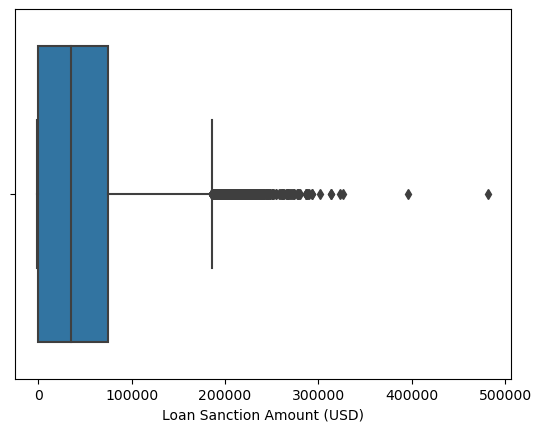

In [139]:
sns.boxplot(x=df['Loan Sanction Amount (USD)']) #large number of outliers so we replace missing values with median

In [140]:
df['Loan Sanction Amount (USD)'].value_counts() #there are unnecessary -999 in the data

 0.00         7865
-999.00        338
 28937.45        3
 54850.85        2
 105047.72       2
              ... 
 56365.75        1
 25094.46        1
 27046.62        1
 59976.36        1
 117217.90       1
Name: Loan Sanction Amount (USD), Length: 21450, dtype: int64

In [141]:
for i in range(len(df)):
    if df['Loan Sanction Amount (USD)'][i]==-999:
        df['Loan Sanction Amount (USD)'][i]=np.nan

C:\Users\User\AppData\Local\Temp\ipykernel_17460\1004701909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan Sanction Amount (USD)'][i]=np.nan


In [142]:
df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].median(),inplace=True)

Now we have replaced all null values with mean,median and mode. We have even removed some columns which showed high correlation of 1 and dropped some unnecessary column. Now our data is almost cleaned

### Encoding Categorical Values

In [146]:
df.select_dtypes(include='object')

,Customer ID,Name,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Dependents,Credit Score,Has Active Credit Card,Property Location
0,C-36995,Frederica Shealy,F,Low,Working,Sales staff,Semi-Urban,N,N,None,None,NaN,Rural
1,C-33999,America Calderone,M,Low,Working,NaN,Semi-Urban,N,Y,None,None,Unpossessed,Rural
2,C-3770,Rosetta Verne,F,High,Pensioner,NaN,Semi-Urban,N,Y,None,None,Unpossessed,Urban
3,C-26480,Zoe Chitty,F,High,Pensioner,NaN,Rural,N,Y,None,None,Unpossessed,Semi-Urban
4,C-23459,Afton Venema,F,Low,Working,High skill tech staff,Semi-Urban,N,Y,None,None,Active,Semi-Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,Low,Commercial associate,Managers,Urban,Y,Y,None,None,Unpossessed,Urban
29996,C-32511,Silas Slaugh,M,Low,Working,Laborers,Semi-Urban,N,N,None,None,Inactive,Urban
29997,C-5192,Carmelo Lone,F,Low,Working,Sales staff,Urban,N,Y,None,None,Active,Rural
29998,C-12172,Carolann Osby,M,Low,Working,Security staff,Semi-Urban,N,Y,None,None,Unpossessed,Urban


Now we are encoding each categorical variables  between 0 and n-1 where n is the number of distinct categories in the variable

In [147]:
from sklearn.preprocessing import LabelEncoder
lblencode=LabelEncoder()

df['Gender']=lblencode.fit_transform(df['Gender'])
df['Expense Type 1']=lblencode.fit_transform(df['Expense Type 1'])
df['Expense Type 2']=lblencode.fit_transform(df['Expense Type 2'])
df['Income Stability']=lblencode.fit_transform(df['Income Stability'])
df['Has Active Credit Card']=lblencode.fit_transform(df['Has Active Credit Card'])

df.head(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,0,56,1933.050,1,Working,Sales staff,Semi-Urban,72809.58,...,None,0,3,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,1,32,4952.910,1,Working,NaN,Semi-Urban,46837.47,...,None,0,2,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,0,65,988.190,0,Pensioner,NaN,Semi-Urban,45593.04,...,None,0,2,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,0,65,2222.435,0,Pensioner,NaN,Rural,80057.92,...,None,1,2,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,0,31,2614.770,1,Working,High skill tech staff,Semi-Urban,113858.89,...,None,1,0,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [148]:
df['Location'].value_counts()

Semi-Urban    21563
Rural          5338
Urban          3099
Name: Location, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
orderencoding=OrdinalEncoder(categories=[['Rural','Semi-Urban','Urban']])
df['Location']=orderencoding.fit_transform(df['Location'].values.reshape(-1,1))


## Scaling the data

In [ ]:
df_num =df.select_dtypes(include=np.number)

In [ ]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
df_num = standard_scale.fit_transform(df_num)
df_num=pd.DataFrame(df_num)
df_num

In [ ]:
df_num.columns=